# The Math of Intelligence Step #5

## by PARK-SI HYUNG. 2019-01-18.
---

# # GENERATIVE MODEL
> 컴퓨터가 스스로 사진, 영화, 텍스트 또는 음악을 만드는 모델입니다
---

# DISCRIMINATIVE
- 사전적 의미는 '구별이 되는'
- 클래스의 차이점에 주목합니다
- 데이터가 어떤 종류인지, 어떤 속성을 가지고 있는지 분별해서 알려주는 모델
- DIFFERENTIATE, CLASSIFY 등등 다양한 용어로 불립니다

> 조건부 확률(P(Y|X))을 사용해 이전 사건을 토대로 분류합니다 

![JPEG](https://datawarrior.files.wordpress.com/2016/05/discriminative_vs_generative.png?w=1314)

# GENERATIVE
- 클래스의 분포에 주목하는 모델
- 새로운 이미지, 비디오, 음악, 텍스트를 생성하는 모델
- JOINT PROBABILITY를 이용해 두개의 서로다른 사건이 동시에 일어납니다 
- 어떤 확률분포와 그 파라미터가 있다고할 때, 그로부터 랜덤 프로세스에 따라 데이터를 생성합니다

# GAN (GENERATIVE ADVERSARIAL NETWORK)
> GENERATIVE MODEL 중 가장 유명한 알고리즘. 생성적 적대 신경망 !?

- 생성자(GENERATOR)와 구분자(DISCRIMINATOR)를 경쟁적으로 학습시킵니다
- 이 둘을 함께 학습시키면서 진짜와 구분할 수 없는 가짜를 만들어내는 생성자를 얻습니다

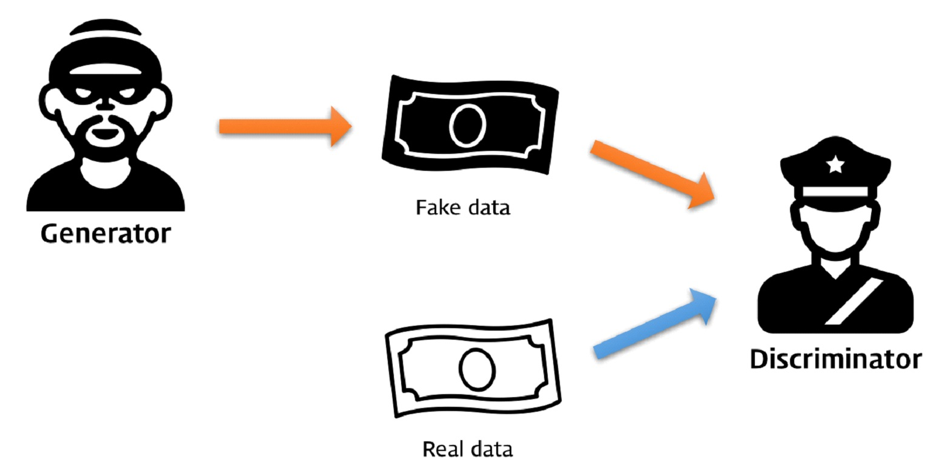




## ✱ GAN으로 생성한 가짜 사람 얼굴 ✱
![JPEG](https://files.slack.com/files-pri/T25783BPY-F9RKVJ9TP/_______________1.png?pub_secret=4674d81e77)

###   

# LATENT DIRICHLET ALLOCATION(LDA)
> 잠재적인 파라미터(α,β,θ,z) / 디리클레 분포 / 할당

![JPEG](http://4four.us/assets/post_image/2010-11-07-latent-dirichlet-allocation-simply-2.png)

- 어떤 문서에 대해 파라미터(θ)가 있고 앞에서부터 단어를 하나씩 채울 때 마다
- θ로부터 하나의 주제를 선택하고, 다시 그 주제로부터 단어를 선택하는 방식입니다
- 문서에서 θ를 계산해 분류 작업이나 유사도 계산을 쉽게 할 수 있습니다
####  

![JPEG](https://i.imgur.com/Mm4yc8t.png)

# LDA을 이용한 TOPIC MODELING
- SEARCH ENGINE 성능 개선
- TREND SUMMARIZATION
- CUSTOMER RESEARCH (트위터 등)

In [1]:
# nltk는 data cleaning에 필요합니다
import pandas as pd
import nltk
import numpy

# 기사들을 불러옵니다
df = pd.read_pickle('df_save.pck')
# 영어로 된 기사만 사용합니다
df = df[df['Language'].isin(['en'])]
# Text 열을 title과 content로 합쳐줍니다
df['Text'] = df['Title'] + ' ' + df['Content']
# 잘 합쳐졌나 실험해봅니다
df[df['Text'].str.contains('S.Korea')].head()

,Date,ArticleCode,Language,Title,Content,Text
12,2015-01-06,1,en,S.Korea says imposes rice import tariff of ove...,"SEOUL, Jan 6 (Reuters) - South Korea confirmed...",S.Korea says imposes rice import tariff of ove...
171,2015-01-21,9,en,S.Korea to levy anti-dumping duty on Japan's p...,"[e]Yoo Seungki SEOUL, Jan. 21 (Xinhua) -- Sout...",S.Korea to levy anti-dumping duty on Japan's p...
770,2015-03-18,9,en,U.S. sets preliminary duties on Turkey pipe im...,"WASHINGTON, March 17 (Reuters) - The United St...",U.S. sets preliminary duties on Turkey pipe im...
2942,2015-11-02,4,en,"China, Japan, S Korea agree to boost trade, wo...",2 November 2015 TODAY (Singapore) SEOUL In a s...,"China, Japan, S Korea agree to boost trade, wo..."
3899,2016-02-15,10,en,S.Korea says time for more G20 policy coordina...,"15 February 2016 Reuters News SEOUL, Feb 15 (R...",S.Korea says time for more G20 policy coordina...


In [2]:
# 'Text' 열에 있는 단어들을 읽기쉽게 normalization 해줍니다
replacements = {
    'Text': {
        r'\'s': '', 
        'Indian': 'India', 
        'nextgeneration': 'next generation', 
        '//iconnect\.wto\.org/': '', 
        '-': ' ', 
        'U.S.': 'United States', 
        'US': 'United States', 
        'S.Korea': 'South Korea', 
        'S. Korea': 'South Korea', 
        'WTO': 'world trade organization', 
        '‘': '', 
        'imports': 'import', 
        'Imports': 'import', 
        'exports': 'export', 
        'Exports': 'export', 
        'NZ ': 'New Zealand ', 
        '\"': '',
        '\'': '', 
    }
}

df.replace(replacements, regex=True, inplace=True)

# 그리고 texts, titles, dates, articlecodes를 list로 바꿔줍니다
texts = df['Text'].tolist()
titles = df['Title'].tolist()
dates = df['Date'].tolist()
articlecodes = df['ArticleCode'].tolist()


print(str(len(texts)) + '개의 texts가 존재합니다')
print(str(len(titles)) + '개의 title이 존재합니다')
print(str(len(dates)) + '개의 date가 존재합니다')
print(str(len(articlecodes)) + '개의 articlecode가 존재합니다')

6409개의 texts가 존재합니다
6409개의 title이 존재합니다
6409개의 date가 존재합니다
6409개의 articlecode가 존재합니다


In [3]:
# 문장에서 a, the, in 같은 중요하지 않은 단어들을 걸러줍니다
nltk.download('stopwords')
my_stop_words = nltk.corpus.stopwords.words('english')
# 필요없는 몇가지를 더 추가해줍시다
my_stop_words = my_stop_words + ['world_trade_organization','years','year','said','important',
                                 'new','would','','','','']

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apostcto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# LDA를 단어 단위로 하니 문서들을 단어로 token화 시켜 줍니다
from nltk.tokenize import MWETokenizer
tokenizer = MWETokenizer([('world', 'bank'),
                          ('world', 'trade', 'organization'),
                          ('doha', 'round'),
                          ('united', 'states'),
                          ('european', 'union'),
                          ('new', 'zealand'),
                          ('per', 'cent'),
                          ('south', 'korea'),
                          ])

# 제대로 token화 되는지 실험해봅니다
tokenizer.tokenize('In a little or a european union little bit world trade organization'.split())

['In',
 'a',
 'little',
 'or',
 'a',
 'european_union',
 'little',
 'bit',
 'world_trade_organization']

In [5]:
# stemming이란 어간추출이란 뜻으로
# 예를들어 reduce를 검색하면 reducing, reduced까지 검색됩니다
# similar token들을 추출해줍니다
# 오래걸립니다

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

In [6]:
# re.search 기능을 위해 import 해줍니다
# tokenize_and_stem 기능을 추가합시다
# 이부분은 복붙복붙
import re

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [7]:
# 본격적으로 stem과 token으로 나눠봅시다
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in texts:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [8]:
# index에 stem을 주고 column에 word를 주어 DataFrame으로 만들어봅니다
# 잘 변환되는지 확인해봅시다
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
vocab_frame.head(20)

there are 3776538 items in vocab_frame


,words
world,world
trade,trade
organ,organization
celebr,celebrates
year,years
of,of
help,helping
global,global
economi,economy
grow,grow


#  
#  
#  

# # LSTM(LONG SHORT TERM MEMORY)
> RNN를 보완한 모델

---

# RNN의 단점 - 장기 의존성 문제
- 관련 정보와 그 정보를 사용하는 지점 사이 거리가 멀 경우 역전파시 GRADIENT가 점차 줄어
- 학습능력이 크게 저하 됩니다. 이것을 VANISHING GRADIENT PROBLEM이라 합니다
- THE CLOUDS ARE IN THE 문장에서 마지막단어로 SKY를 예측하기는 쉽지만
- I GREW UP IN FRANCE WHEN I WAS YOUNG .... I SPEAK FLUENT ? 처럼
- 표현의 위치가 멀어지는 문제가 빈번히 발생합니다
###   
![JPEG](http://i.imgur.com/H9UoXdC.png)

#   
#   

# LSTM MEMORY CELL

#### 3개의 GATE와 2개의 STATE로 구성되어 있습니다
- INPUT GATE (SAVE VECTOR)
- OUTPUT GATE (FOCUS VECTOR)
- FORGET GATE (REMEMBER VECTOR)
- CELL STATE(LONG-TERM MEMORY)
- HIDDEN STATE(WORKING MEMORY)


> LSTM의 메커니즘 : 입력을 받아들이고 / 기억하고 / 무엇에 집중할지 선택

#### - RNN이 FULL LONG-TERM MEMORY를 사용하는데 반해
![JPEG](https://i.imgur.com/XSZ29d2.png)
#### - LSTM은 어느 부분을 강조해야 할지 학습합니다
![JPEG](https://i.imgur.com/TpD6qpJ.png)

![JPEG](https://camo.githubusercontent.com/284f12768a57940bbd21c5e9746e5d4bf6f22fea/68747470733a2f2f7777772e7265736561726368676174652e6e65742f70726f66696c652f4d6f6873656e5f46617979617a2f7075626c69636174696f6e2f3330363337373037322f6669677572652f666967322f41533a33393830383238343931363533313440313437313932313735353538302f4669672d322d416e2d6578616d706c652d6f662d612d62617369632d4c53544d2d63656c6c2d6c6566742d616e642d612d62617369632d524e4e2d63656c6c2d72696768742d4669677572652e70706d)

 